# Classification

Setting up environment for modeling. Explore the data to understand feature correlations, determine which features to include and running different models to find the best fit. 

Models Attempted:

- [**Logistic Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [**Decision Trees**](https://scikit-learn.org/stable/modules/tree.html)

- [**Gradient Boosting**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [**Random Forest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [**Extra Trees**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

# **Load Adjusted Dataset**

The original dataset on Kaggle removed a large amount of weather data during the final data cleaning steps. In order to improve our weather based predictions we re-ran the data collection process and re-included removed data points.

### Preview of available data

Combining the test and train files here because they are split later in the code for this method. They were pre-split in the Kaggle file the data was taken from.

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import the modules
import os
import pandas as pd
    
#read the path
file_path = 'data/csv_files'
#list all the files from the directory
csv_files = os.listdir(file_path)

#append all files together
flight_data = pd.DataFrame()

for file in csv_files:
            df_temp = pd.read_csv('data/csv_files/'+file)
            flight_data = flight_data.append(df_temp, ignore_index=True)
flight_data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,81803,180,819756,12460183,0.000144,0.000149,18,Chicago Midway International,41.785,-87.752,Atlanta Municipal,0.00,0.0,0.0,64.0,13.87,49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.00,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,43512,4679,2743323,8501631,0.000254,0.000229,7,Stapleton International,39.774,-104.880,Los Angeles International,0.00,0.0,0.0,54.0,10.07,38.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,21136,1629,2780593,2884187,0.000032,0.000175,3,Los Angeles International,33.942,-118.408,Portland International,0.00,0.0,0.0,64.0,7.38,58.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,114987,6116,1903352,13382999,0.000062,0.000099,20,McCarran International,36.080,-115.152,Spokane International,0.00,0.0,0.0,104.0,4.92,92.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,24179,453,70476,1245396,0.000000,0.000090,17,James M Cox/Dayton International,39.901,-84.220,Philadelphia International,0.00,0.0,0.0,86.0,4.92,0.0,65.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217198,0.222554,0.251477,0.292230
6489058,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,110752,5250,673221,13382999,0.000062,0.000099,20,Dallas Love Field,32.847,-96.853,Austin - Bergstrom International,0.00,0.0,0.0,85.0,8.05,70.0,62.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.192585,0.171317,0.263840
6489059,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,110752,5085,1827202,13382999,0.000062,0.000099,1,Phoenix Sky Harbor International,33.436,-112.009,Portland International,0.00,0.0,0.0,89.0,4.03,74.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.112840,0.203724,0.266095
6489060,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,81498,4932,1486066,12460183,0.000144,0.000149,19,Detroit Metro Wayne County,42.217,-83.344,Douglas Municipal,0.38,0.0,0.0,44.0,9.17,40.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157390,0.186040,0.226980,0.286800


In [35]:
pd.set_option('display.max_columns', None)
flight_data.head() #display sample dataframe

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,81803,180,819756,12460183,0.000144,0.000149,18,Chicago Midway International,41.785,-87.752,Atlanta Municipal,0.0,0.0,0.0,64.0,13.87,49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.0,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,43512,4679,2743323,8501631,0.000254,0.000229,7,Stapleton International,39.774,-104.880,Los Angeles International,0.0,0.0,0.0,54.0,10.07,38.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,21136,1629,2780593,2884187,0.000032,0.000175,3,Los Angeles International,33.942,-118.408,Portland International,0.0,0.0,0.0,64.0,7.38,58.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,114987,6116,1903352,13382999,0.000062,0.000099,20,McCarran International,36.080,-115.152,Spokane International,0.0,0.0,0.0,104.0,4.92,92.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067


In [36]:
print("Available data points within dataset:")
for col in flight_data.columns: 
    print(col)

Available data points within dataset:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


## Restrict to LaGuardia

In our initial Classification attempt, covering all US airports, we were not able to get a very high AUC score. We hypothesize that this could be because there is a high variability in delay causes by airport and, by looking at a single airport, we can improve our results. Some airports may be very effected by weather, and others less so. Different types of weather will impact some airports more than others. From the Bureau of Transportation we learned that some airports are better equipped to handle weather delays than others, so even the same type of weather at a different location may not cause the same delay result.

From our exploratory data analysis we saw that LaGuardia is very likely to be the Previous Airport for a delayed flight, despite not being in the top of airports by total flight volume. This makes it an interesting airport to examine for delay prediction.

In [37]:
#set ny as copy of flight data to prevent SettingwithCopyWarning
ny = flight_data.loc[flight_data['DEPARTING_AIRPORT'] == "LaGuardia"].copy()
ny.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.00,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
123,11,3,0,0600-0659,5,1,38,191,Delta Air Lines Inc.,13490,79989,2272,1208249,12460183,0.000144,0.000149,3,LaGuardia,40.779,-73.876,NONE,0.00,0.0,0.0,35.0,14.99,29.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100882,0.187883,0.147498,0.059997
165,9,4,0,1300-1359,2,4,35,69,"Midwest Airline, Inc.",13885,27183,2801,1208249,1529740,0.000001,0.000124,13,LaGuardia,40.779,-73.876,Port Columbus International,0.00,0.0,0.0,82.0,9.40,72.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111274,0.116533,0.167321,0.136288
214,6,5,1,1200-1259,3,2,28,76,"Midwest Airline, Inc.",14033,26990,2759,1208249,1529740,0.000001,0.000124,5,LaGuardia,40.779,-73.876,Northwest Arkansas Regional,0.54,0.0,0.0,78.0,12.97,71.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208937,0.246592,0.222678,0.211236
220,10,3,1,1500-1559,6,4,33,143,Southwest Airlines Co.,14544,115051,1036,1208249,13382999,0.000062,0.000099,14,LaGuardia,40.779,-73.876,Atlanta Municipal,1.71,0.0,0.0,67.0,16.11,60.0,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179323,0.158888,0.157511,0.196905


## Set up Environment

In [38]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

## Determine how many observations fall under each class 
### 0 : not delayed 1 : delayed

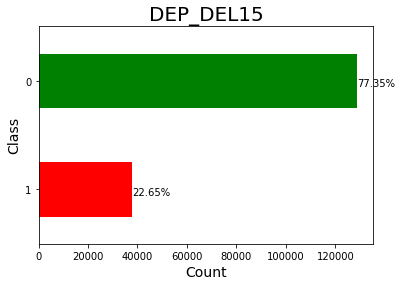

0    128943
1     37766
Name: DEP_DEL15, dtype: int64


In [39]:
# Plotting the percentage of observations that fall under each class
ax = ny["DEP_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("DEP_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(ny["DEP_DEL15"].value_counts())
fig = ax.get_figure()

## Point Biserial Correlation for Quantitative, Continuous Features with DEP_DEL15

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.  [Interpreting PBC](https://www.scalestatistics.com/point-biserial.html)

When we looked at all airports the highest correlation for DEP_DEL15 was with WTO3 (Thunder), PRCP (precipitation) and WT01 (fog). LaGuardia has similiar results with the highest correlation for WT01 (fog), PRCP (precipitation), AWND(max wind speed) and WTO3 (Thunder).

In [40]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
ny["CARRIER_NAME"] = labelEncoder.fit_transform(ny["CARRIER_NAME"])
ny["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(ny["PREVIOUS_AIRPORT"])
ny["DEPARTING_AIRPORT"] = labelEncoder.fit_transform(ny["DEPARTING_AIRPORT"])
ny["DEP_TIME_BLK"] = labelEncoder.fit_transform(ny["DEP_TIME_BLK"])

# get continuous and dichotomous data
categorical = ["DEP_DEL15","MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","DEPARTING_AIRPORT","LATITUDE","LONGITUDE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST"]
#Remove W07 because values are constant
numeric = ["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08","WT09"]
target = ny["DEP_DEL15"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(ny[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,WT01,0.123578,0.000000e+00
1,PRCP,0.119952,0.000000e+00
2,AWND,0.110142,0.000000e+00
3,WT03,0.107311,0.000000e+00
4,WT08,0.072044,1.125435e-190
5,SNOW,0.068229,3.521050e-171
6,WT02,0.054130,2.148472e-108
7,SNWD,0.039685,4.297134e-59
8,WT05,0.034987,2.548993e-46
9,WT09,0.015446,2.849033e-10


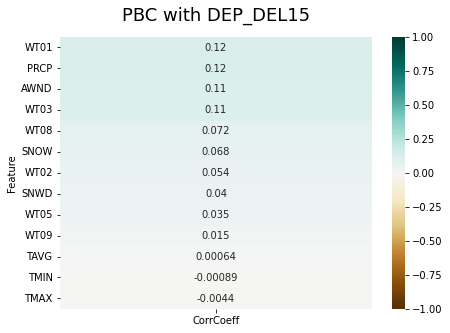

In [41]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with DEP_DEL15", fontdict={"fontsize":18}, pad=16);


## Spearman Coefficient with categorical data

Weather is not the only factor that causes delays. We can see here that there is a strong correlation between departing block historical, segment number and carrier historical. Carrier historical is less important for LaGuardia than it was for all airports.

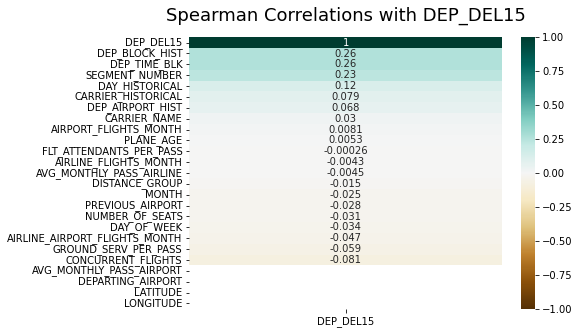

In [42]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(ny[categorical].corr(method="spearman")[["DEP_DEL15"]].sort_values(by="DEP_DEL15", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with DEP_DEL15", fontdict={"fontsize":18}, pad=16)
plt.savefig("data/Img/05_03_Spearman_Dep_Del15.png")
del heatmap

## Feature Selection

1. Clean up non-numerical values and remove any problematic NA or infinite values.
2. Obtain and visualize feature importance ranking
3. Select features based on importance ranking

In [43]:
#Convert all data to numeric
ny = ny.apply(pd.to_numeric)

# check for nulls
nan_in_df = ny.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))
 
ny.dropna(subset=['DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'], inplace=True)

nan_in_df = ny.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))

print("printing column name where infinity is present")
col_name = ny.columns.to_series()[np.isinf(ny).any()]
print(col_name)

Number of NaN values present: 0
Number of NaN values present: 0
printing column name where infinity is present
Series([], dtype: object)


### What happens if we look at weather data alone as features?

Is historical weather data enough to adequately predict flight delays?

In [44]:
#Select all data as features
X = ny[["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08","WT09","WT10","WT11"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())


y = np.asarray(ny["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)

importances = model.feature_importances_
importances

array([1.50604900e-01, 4.05207881e-02, 8.43432927e-03, 1.48837749e-01,
       2.25372449e-01, 1.43012519e-01, 1.51213739e-01, 4.86495808e-02,
       1.33890842e-02, 5.00574471e-02, 7.13642695e-04, 1.90469059e-02,
       1.46864934e-04, 0.00000000e+00, 0.00000000e+00])

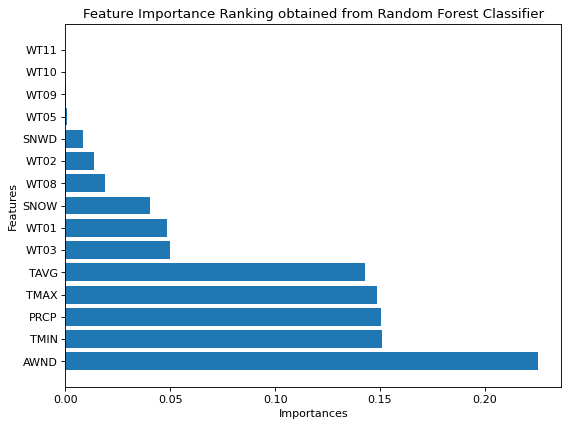

In [45]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

In [46]:
del X
del y
del model
del importances

Based on these results we will remove W11, W10, W09, W05 from features. W07 was removed earlier because data was not unique for LaGuardia.

In [47]:
#Select relevant data as features
X = ny[["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(ny["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.14791369, 0.03849051, 0.00807435, 0.15095412, 0.22471599,
       0.14261573, 0.14695753, 0.05766779, 0.01435302, 0.05300384,
       0.01525341])

In [48]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (166709, 11)
features_train shape: (33341, 11) | features_test shape: (133368, 11)
labels_train shape: (33341,) | labels_test shape: (133368,)


### Logistic Regression Model with Weather Features

[[102722    423]
 [ 29690    533]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    103145
           1       0.56      0.02      0.03     30223

    accuracy                           0.77    133368
   macro avg       0.67      0.51      0.45    133368
weighted avg       0.73      0.77      0.68    133368



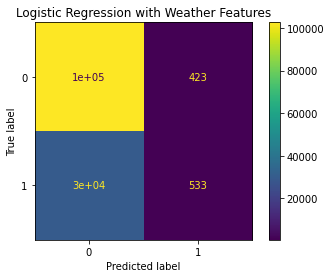

In [49]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression_Weather")

### Decision Tree Classifier with Weather Features

              precision    recall  f1-score   support

           0       0.80      0.97      0.88    103145
           1       0.61      0.18      0.28     30223

    accuracy                           0.79    133368
   macro avg       0.70      0.57      0.58    133368
weighted avg       0.76      0.79      0.74    133368



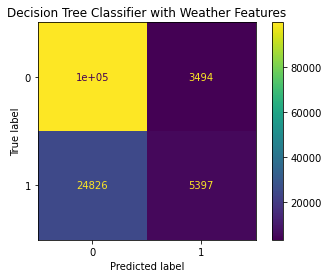

In [50]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix_Weather")


## Gradient Boosting with Weather Features

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    103145
           1       0.61      0.13      0.22     30223

    accuracy                           0.78    133368
   macro avg       0.70      0.55      0.55    133368
weighted avg       0.75      0.78      0.73    133368



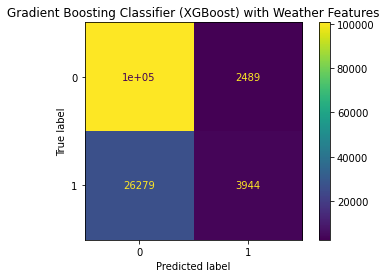

In [51]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost_Weather")

## Random Forest with Weather Features

Increased default size of trees to improve accuracy.

[[99467  3678]
 [24621  5602]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.88    103145
           1       0.60      0.19      0.28     30223

    accuracy                           0.79    133368
   macro avg       0.70      0.57      0.58    133368
weighted avg       0.76      0.79      0.74    133368



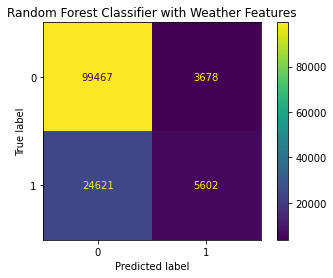

In [52]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix_Weather")
del model
del model_pred

## Extra Trees

Increased default size of trees to improve accuracy.

[[99651  3494]
 [24826  5397]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    103145
           1       0.61      0.18      0.28     30223

    accuracy                           0.79    133368
   macro avg       0.70      0.57      0.58    133368
weighted avg       0.76      0.79      0.74    133368



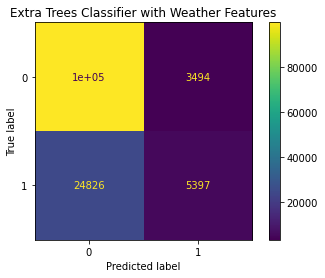

In [53]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix_Weather")

## Result

We have improved our results, even just considering weather data, by looking only at LaGuardia. Let's look at AUC scores to see how much better they are.

|     Classification Model     |  |      |        |      |  Performance Metric        |      |          |   |
|:----------------------------:|:------------------:|:----:|:------:|:----:|:--------:|:----:|:--------:|:-:|
|                              |      Precision     |      | Recall |      | F1 Score |      | Accuracy |   |
|                              |         0.0        |  1.0 |   0.0  |  1.0 |    0.0   |  1.0 |          |   |
|      Logistic Regression     | 0.78               | 0.56 | 1.00   | 0.02 | 0.87     | 0.03 | 0.77     |   |
|   Decision Tree Classifier   | 0.80               | 0.61 | 0.97   | 0.18 | 0.88     | 0.28 | 0.79     |   |
|      Gradient Boosting Classifier | 0.79               | 0.61 | 0.98   | 0.13 | 0.87    | 0.22 | 0.78     |   |
| Random Forest Classifier | 0.80               | 0.60 | 0.96   | 0.19 | 0.88     | 0.28 | 0.79     |   |
|   Extra Trees Classifier    | 0.80               | 0.61 | 0.97   | 0.18 | 0.88     | 0.28 | 0.79     |   |

In [54]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

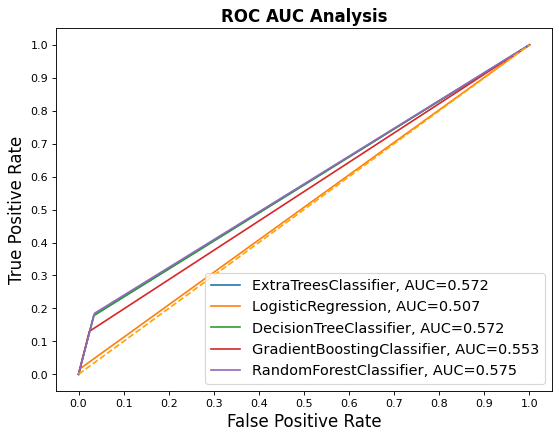

In [55]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Is weather data alone providing an accurate prediction?

We have notably improved our AUC by limiting to LaGuardia. For all airports our highest score was 0.522 when looking at weather data alone. Here we have reached 0.575. When we focus on a single location, we are seeing a stronger relationship between weather and flight delays. We can see that both in the correlations between weather data and delays being higher for a single airport and in the improved overall prediction results.

Now, let's try to classify with all available data to see how we can improve our predictions.

## Classification with All Available Data

We can remove DEPARTING_AIRPORT, AVG_MONTHLY_PASS_AIRPORT, LATITUTE, LONGITUTE, AIRPORT_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH because airport is always LaGuardia so data will not vary. We will use the same weather features that we selected from the previous models.

In [56]:
#Select all data as features

X = ny[["MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRLINE_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST","PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(ny["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.0141496 , 0.02764731, 0.06993427, 0.04914863, 0.0508661 ,
       0.05480431, 0.03760268, 0.01785693, 0.02995826, 0.01705002,
       0.01590231, 0.01846202, 0.06997476, 0.06790106, 0.0317503 ,
       0.0774127 , 0.0387178 , 0.07469155, 0.0304299 , 0.00550217,
       0.00168581, 0.0398086 , 0.05447291, 0.03810748, 0.03984541,
       0.00924424, 0.00310136, 0.00906126, 0.00491023])

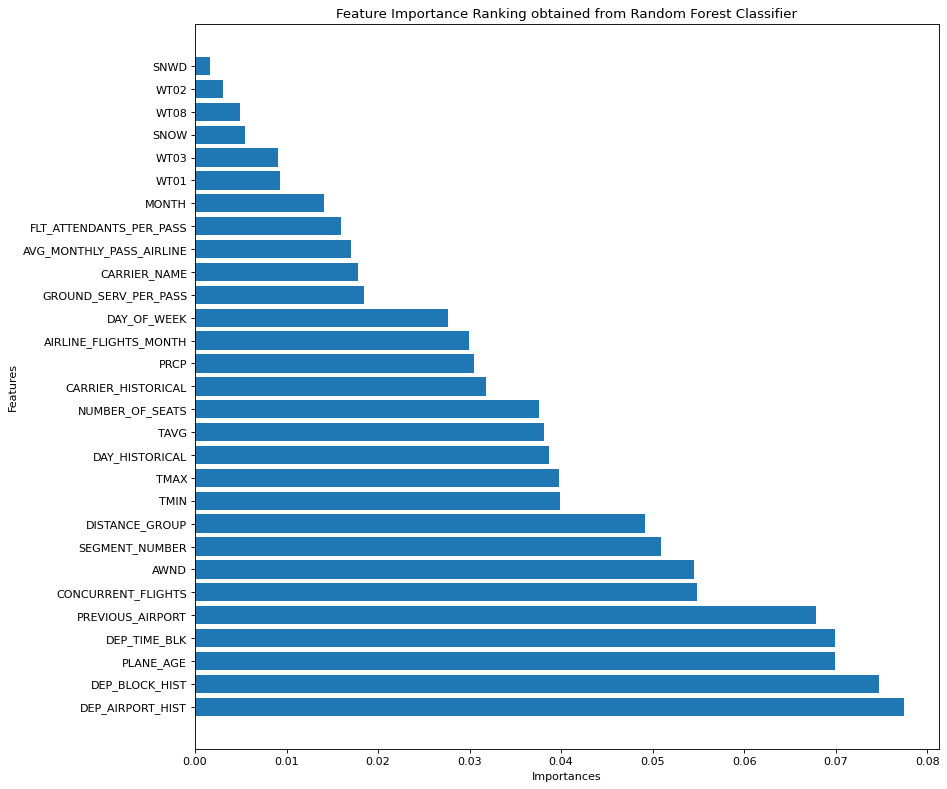

In [57]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(12, 12), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

Once again, weather is still not the most important feature in our data. This indicates we will probably get better accuracy by including additional features.

In [58]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (166709, 29)
features_train shape: (33341, 29) | features_test shape: (133368, 29)
labels_train shape: (33341,) | labels_test shape: (133368,)


## Logistic Regression with All Features

[[99879  3266]
 [24438  5785]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    103145
           1       0.64      0.19      0.29     30223

    accuracy                           0.79    133368
   macro avg       0.72      0.58      0.59    133368
weighted avg       0.77      0.79      0.75    133368



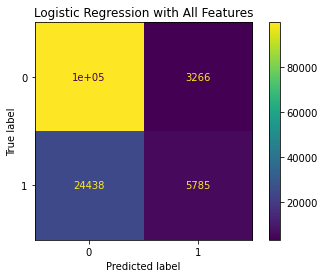

In [59]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression")

## Decision Tree with All Features

              precision    recall  f1-score   support

           0       0.84      0.83      0.83    103145
           1       0.44      0.46      0.45     30223

    accuracy                           0.74    133368
   macro avg       0.64      0.64      0.64    133368
weighted avg       0.75      0.74      0.75    133368



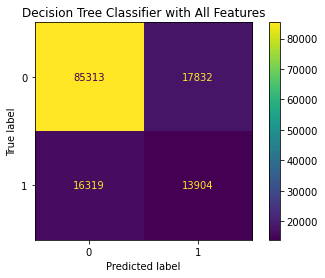

In [60]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix")

## Gradient Boosting with All Features

              precision    recall  f1-score   support

           0       0.82      0.97      0.89    103145
           1       0.74      0.29      0.42     30223

    accuracy                           0.82    133368
   macro avg       0.78      0.63      0.65    133368
weighted avg       0.80      0.82      0.78    133368



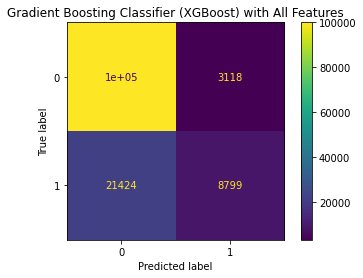

In [61]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost")

## Random Forest with All Features

[[98535  4610]
 [18035 12188]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    103145
           1       0.73      0.40      0.52     30223

    accuracy                           0.83    133368
   macro avg       0.79      0.68      0.71    133368
weighted avg       0.82      0.83      0.81    133368



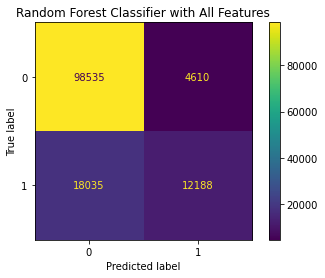

In [62]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix")
del model
del model_pred

## Extra Trees with All Features

[[97077  6068]
 [17886 12337]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    103145
           1       0.67      0.41      0.51     30223

    accuracy                           0.82    133368
   macro avg       0.76      0.67      0.70    133368
weighted avg       0.80      0.82      0.80    133368



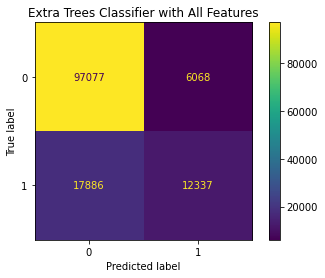

In [63]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix")

In [64]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

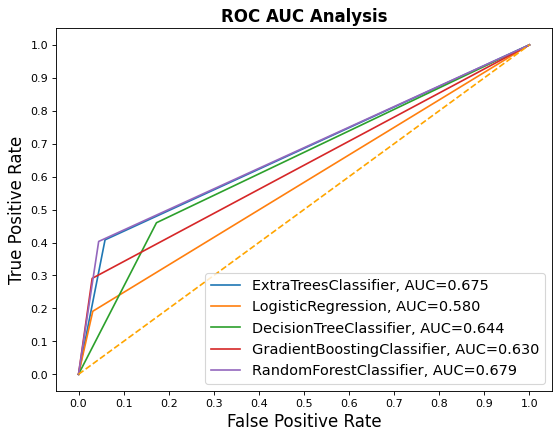

In [65]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Conclusion

Including non-weather features in our modeling notably improved results. Our highest AUC score with weather data only was 0.576, including additional features increased our best result to 0.679. 

What happens if we look at an airport with less extreme weather, like Douglas Municipal in Arizona?
